In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [142]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [143]:
df = pd.read_csv("/Users/sumith/Downloads/AIML Dataset.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [144]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [145]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [146]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [147]:
df.isnull().sum().sum()

np.int64(0)

In [148]:
df.shape

(6362620, 11)

In [149]:
round(df["isFraud"].value_counts()[1] / df.shape[0] * 100,2)

np.float64(0.13)

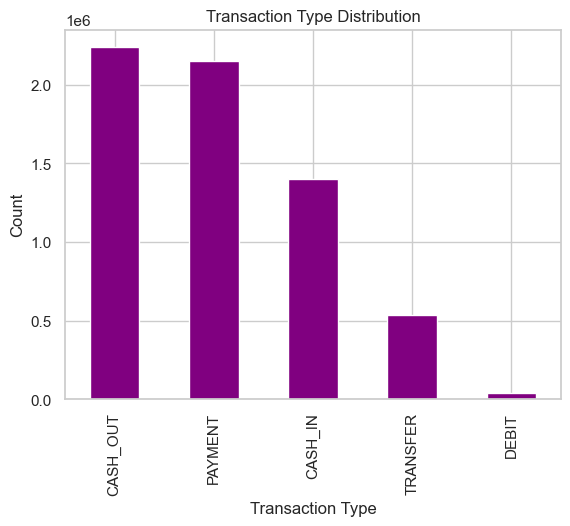

In [150]:
df['type'].value_counts().plot(kind='bar',title='Transaction Type Distribution',color='purple')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

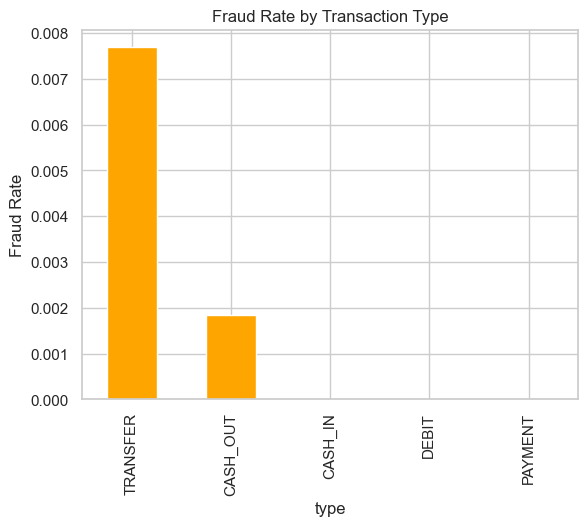

In [151]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='orange')
plt.ylabel('Fraud Rate')
plt.show()

In [152]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

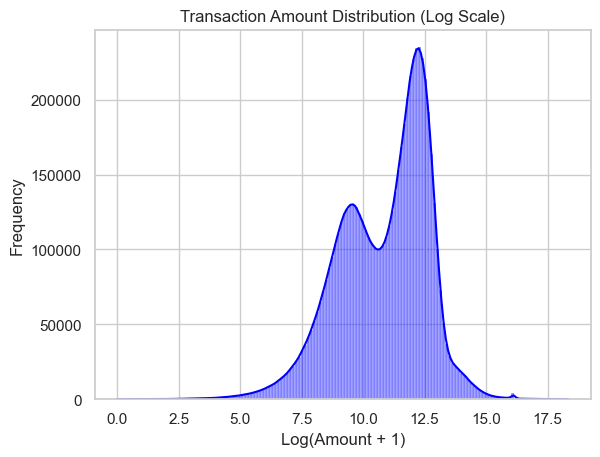

In [153]:
sns.histplot(np.log1p(df['amount']), bins=150, kde=True, color='blue')
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()


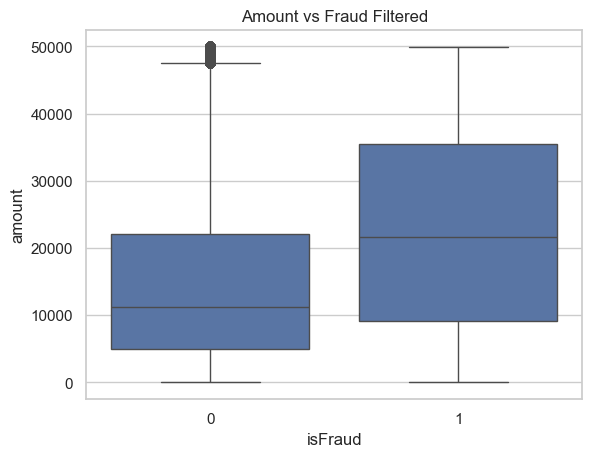

In [154]:
sns.boxplot(data= df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title('Amount vs Fraud Filtered')
plt.show()

In [155]:
df['balanceDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']


In [156]:
(df['balanceDiff'] < 0).sum()

np.int64(1399253)

In [157]:
(df['balanceDiffDest'] < 0).sum()

np.int64(2806464)

In [158]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


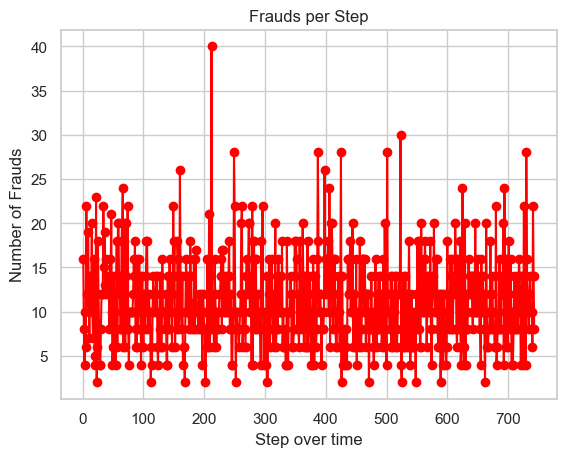

In [159]:
frauds_per_step = (
    df[df['isFraud'] == 1]['step']
    .value_counts()
    .sort_index()
)

plt.plot(
    frauds_per_step.index,
    frauds_per_step.values,
    marker='o',
    color='red'
)

plt.xlabel('Step over time')
plt.ylabel('Number of Frauds')
plt.title('Frauds per Step')
plt.grid(True)
plt.show()


In [160]:

df.drop(columns='step', inplace=True)

In [161]:
top_senders = df['nameOrig'].value_counts().head(20)

In [162]:
top_receivers = df['nameDest'].value_counts().head(20)

In [163]:
top_senders, top_receivers

(nameOrig
 C1902386530    3
 C363736674     3
 C545315117     3
 C724452879     3
 C1784010646    3
 C1677795071    3
 C1462946854    3
 C1999539787    3
 C2098525306    3
 C400299098     3
 C1832548028    3
 C1976208114    3
 C2051359467    3
 C1065307291    3
 C1530544995    3
 C17383104      2
 C395795711     2
 C1388763820    2
 C1016934729    2
 C1518561015    2
 Name: count, dtype: int64,
 nameDest
 C1286084959    113
 C985934102     109
 C665576141     105
 C2083562754    102
 C248609774     101
 C1590550415    101
 C451111351      99
 C1789550256     99
 C1360767589     98
 C1023714065     97
 C977993101      96
 C97730845       96
 C392292416      95
 C1899073220     92
 C306206744      91
 C1234776885     90
 C1782113663     90
 C998351292      89
 C716083600      89
 C909295153      88
 Name: count, dtype: int64)

In [164]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(20)

In [165]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
C1579869749    1
C1133500128    1
C2111179588    1
C1400717591    1
C937734682     1
C738609409     1
C1911667833    1
C194800493     1
C1069177491    1
C489467109     1
Name: count, dtype: int64

In [166]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [167]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

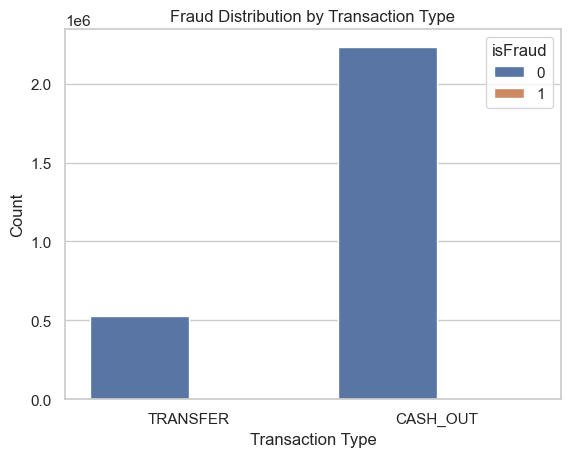

In [168]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [169]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [170]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


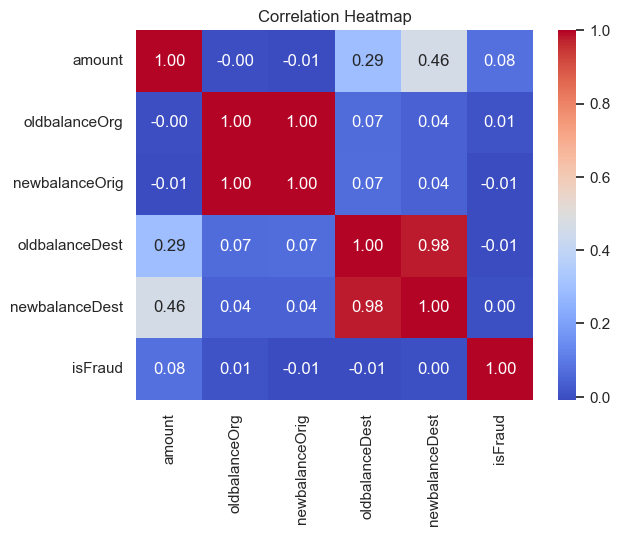

In [171]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [172]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [173]:
len(zero_after_transfer)

1188074

In [174]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder    

In [176]:
df_model = df.drop(columns=['nameOrig', 'nameDest','isFlaggedFraud'])



In [177]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiff,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [178]:
y = df_model['isFraud']
x = df_model.drop(columns=['isFraud'])

In [179]:
catergorical = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [181]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), catergorical)],
    remainder='drop')

In [182]:
Pipeline = Pipeline([
    ('preprocessing', preproccessing),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [183]:
Pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [184]:
y_pred = Pipeline.predict(x_test)

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [186]:
confusion_matrix(y_test, y_pred)

array([[1803363,  102959],
       [    145,    2319]])

In [187]:
Pipeline.score(x_test, y_test) * 100

94.59845158126684

In [188]:
import joblib

joblib.dump(Pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

In [ ]:
import os
print(os.getcwd())





/Users/sumith/Downloads


NameError: name 'fraud_detection_pipeline' is not defined

In [193]:
joblib.dump(
    Pipeline,
    "/Users/sumith/Desktop/fraud_detection_pipeline.pkl"
)


['/Users/sumith/Desktop/fraud_detection_pipeline.pkl']

In [194]:
import shutil

shutil.move(
    "fraud_detection_pipeline.pkl",
    "/Users/sumith/Desktop/fraud_detection_pipeline.pkl"
)


'/Users/sumith/Desktop/fraud_detection_pipeline.pkl'

In [195]:
import os
os.path.getsize("/Users/sumith/Desktop/fraud_detection_pipeline.pkl") / 1024


3.9072265625